In [7]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
import os
from dotenv import load_dotenv
%matplotlib inline

In [8]:
load_dotenv
api_key = os.environ["IBM_API_KEY"]

print(api_key)

3c65a5d8db7db64813d76e2d22959168d44c3fe8c7687381b03c5a70f42165f0d85d065a5ab89e6dcf8ef70cf4279685efa085838e00f1f129c56ed9819bf01a


/Users/uladkaminski/Projects/qc/.conda/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


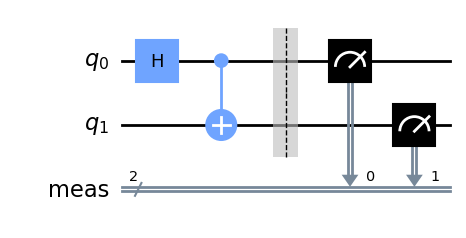

In [9]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure_all()
circuit.draw(output='mpl')

/var/folders/8s/0mgsdm81367b1mr6dd9yxj6m0000gn/T/ipykernel_20138/4001889235.py:2: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(circuit, backend=backend).result()


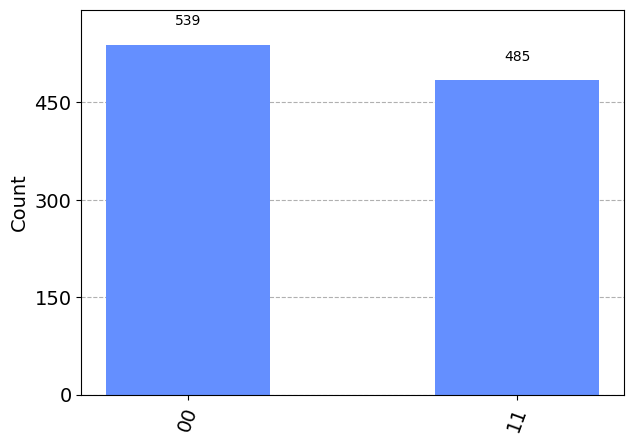

In [10]:
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=backend).result()
plot_histogram(result.get_counts())

In [15]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.tools.monitor import job_monitor
IBMQ.save_account(api_key)
provider = IBMQ.load_account()

/var/folders/8s/0mgsdm81367b1mr6dd9yxj6m0000gn/T/ipykernel_20138/2831527577.py:3: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account(api_key)
/var/folders/8s/0mgsdm81367b1mr6dd9yxj6m0000gn/T/ipykernel_20138/2831527577.py:3: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account(api_key)


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>


### IBM qasm simulator

Before running on the real quantum hardware it worth to verify it on simulator

In [16]:
qcomp = provider.get_backend('ibmq_qasm_simulator')
job = execute(circuit, backend=qcomp)
job_monitor(job)

/var/folders/8s/0mgsdm81367b1mr6dd9yxj6m0000gn/T/ipykernel_20138/2531690982.py:2: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(circuit, backend=qcomp)


Job Status: job has successfully run


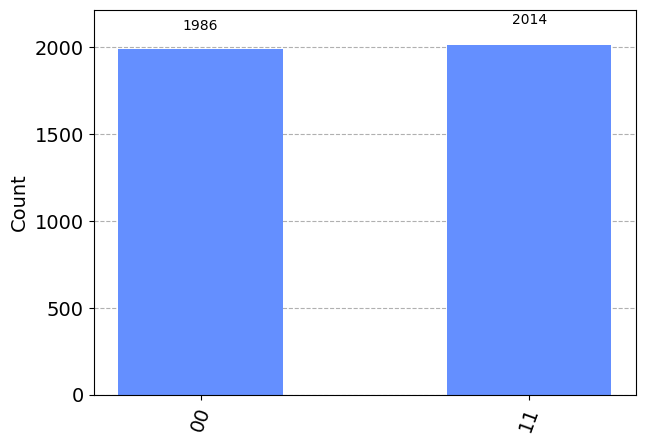

In [17]:
qcomp_result = job.result()
plot_histogram(qcomp_result.get_counts())

### Run on real IBM Cloud Quantum computer

In [18]:
qcomp = provider.get_backend('ibm_kyoto')
job = execute(circuit, backend=qcomp)
job_monitor(job)

/var/folders/8s/0mgsdm81367b1mr6dd9yxj6m0000gn/T/ipykernel_20138/4288562159.py:2: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(circuit, backend=qcomp)


Job Status: job has successfully run


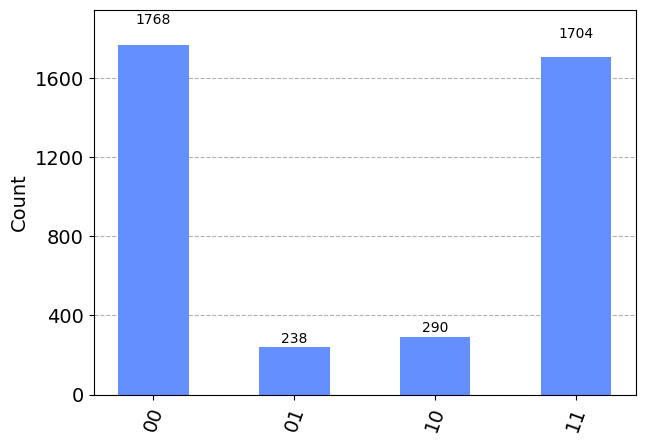

In [19]:
qcomp_result = job.result()
plot_histogram(qcomp_result.get_counts())

The real computations result can be differ from theoretical one due to noise and decoherence